<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
panelftunepath = glob.glob('../../data_final/fig2_panel_ftune.pkl')
panel_ftune = pickle.load(open(panelftunepath[0],'rb'))
panel_ftune.keys()

dict_keys(['x', 'y', 'xset', 'yset', 'xin', 'yin', 'xout', 'yout', 'xmeas', 'ymeas', 'xlim', 'ylim', 'xlabel', 'ylabel'])

In [4]:
panelomstylepath = glob.glob('../../data_final/fig2_panel_omstyle.pkl')
panel_omstyle = pickle.load(open(panelomstylepath[0],'rb'))
panel_omstyle.keys()

dict_keys(['x', 'y', 'w0', 'p0', 'wlf', 'plf', 'p02', 'plf2'])

In [5]:
panelspectrumpath = glob.glob('../../data_final/fig2_panel_spectrum.pkl')
panel_spectrum = pickle.load(open(panelspectrumpath[0],'rb'))
panel_spectrum.keys()

dict_keys(['x', 'y', 'ymax', 'iset', 'ppump', 'xlabel', 'ylabel'])

In [6]:
dpi = 1000
annsz = 8
figtextsize=10

In [7]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

In [8]:
# we need to format the xticks if we want to display plus signs
# taken from https://stackoverflow.com/questions/35415757/adding-sign-to-exponent-in-matplotlib-axes

import matplotlib.ticker as ticker
# this is the function the FuncFormatter will use
def myfmt(x,pos):
    if x <= 0:
        # negative sign is added automatically  
        return u"{:.0f}".format(x)
    else:
        # we need to explicitly add the positive sign
        return u"+{:.0f}".format(x)

# Define the formatter
formatter = ticker.FuncFormatter(myfmt)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


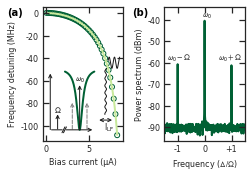

In [9]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(8.6,6),constrained_layout=True)
gs = fig.add_gridspec(1, 2, wspace=0.4)

axa = fig.add_subplot(gs[0,0])
plt.scatter(panel_ftune['xmeas'],panel_ftune['ymeas'],edgecolors=cmap(0.1),facecolors='None',zorder=-1)
plt.plot(panel_ftune['x'],panel_ftune['y'],c=cmap(0.7),zorder=-1)
plt.plot(panel_ftune['xin'],panel_ftune['yin'],c='k',lw=1,zorder=-1)
plt.plot(panel_ftune['xout'],panel_ftune['yout'],c='k',lw=1,zorder=-1)
plt.annotate("", xy=(6, -95), xytext=(8, -95), arrowprops=dict(arrowstyle="<->",color='k'))
plt.text(7-0.2,-104,r'I$_\mathrm{LF}$')
plt.xlabel('Bias current (µA)')
plt.ylabel('Frequency detuning (MHz)')

axinsa = inset_axes(axa, width="60%", height="50%", loc=3)
plt.sca(axinsa)
plt.plot(panel_omstyle['x'],panel_omstyle['y'],c=cmap(0.1))
plt.plot(0,0) # no need to scale this way
# frequency components
plt.annotate("", xy=(panel_omstyle['w0'], panel_omstyle['p0']), xytext=(panel_omstyle['w0'], -0.02),
             arrowprops=dict(arrowstyle="->",color='k'))
plt.annotate("", xy=(panel_omstyle['wlf'], panel_omstyle['plf']), xytext=(panel_omstyle['wlf'], -0.02),
             arrowprops=dict(arrowstyle="->",color='k'))
df = panel_omstyle['wlf']#0.2
ds = 0.3
plt.annotate("", xy=(panel_omstyle['w0']+df, panel_omstyle['p0']-ds), xytext=(panel_omstyle['w0']+df, -0.02),
             arrowprops=dict(arrowstyle="->",linestyle='dashed',ec='grey'))
plt.annotate("", xy=(panel_omstyle['w0']-df, panel_omstyle['p0']-ds), xytext=(panel_omstyle['w0']-df, -0.02),
             arrowprops=dict(arrowstyle="->",linestyle='dashed',ec='grey'))

# labels for frequency components
plt.text(panel_omstyle['w0'], panel_omstyle['p02'], '$\omega_0$',
         {'color': 'k', 'ha': 'center', 'va': 'center', 'fontsize':annsz})
plt.text(panel_omstyle['wlf'], panel_omstyle['plf2'], '$\Omega$',
         {'color': 'k', 'ha': 'center', 'va': 'center', 'fontsize':annsz})
# diagonal cuts in axes
d = .05
x0 = 0.5
dx = 0.05
plt.plot((x0-d,x0+d),(-d,+d),'k',lw=1) # bottom-left diagonal
plt.plot((x0-dx-d,x0-dx+d),(-d,+d),'k',lw=1) # bottomr-right diagonal
# axes
plt.annotate("", xy=(x0-0.025, 0), xytext=(-0.025, 0), arrowprops=dict(arrowstyle="-",color='k')) # xaxis1
plt.annotate("", xy=(max(panel_omstyle['x']), 0), xytext=(x0-0.025, 0), arrowprops=dict(arrowstyle="->",color='k')) # xaxis2
plt.annotate("", xy=(0, 1), xytext=(0, -.03), arrowprops=dict(arrowstyle="->",color='k')) # yaxis
axinsa.axis('off')

axb = fig.add_subplot(gs[0,1])
plt.plot(panel_spectrum['x'],panel_spectrum['y'],c=cmap(0.1),zorder=-1)
plt.xlabel('Frequency ($\Delta/\Omega$)')
plt.ylabel('Power spectrum (dBm)')
plt.gca().set_ylim(top=-34)
plt.xlim(-1.5,1.5)
plt.gca().xaxis.set_major_formatter(formatter)
plt.text(0-.1,-39,r'$\omega_0$')
plt.text(-1-.4,-59,r'$\omega_0-\Omega$')
plt.text(+1-.5,-59,r'$\omega_0+\Omega$')
    
axa.text(-0.34,0.96, '(a)', fontsize=figtextsize,color='black', weight='bold', transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(-0.3,0.96, '(b)', fontsize=figtextsize,color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('Figure2.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()

In [10]:
panel_ftune['xmeas'][-2:],panel_ftune['ymeas'][-2:]

(array([8.16326531, 8.36734694]), array([ -89.71365702, -108.37647886]))

In [11]:
import numpy as np
np.gradient(panel_ftune['y'],panel_ftune['x'])[-2:]

array([-104.90599492, -105.87820764])